# <font color='blue'> Análisis de una imagen de nanohojas de grafeno

Autor de la imagen: Fís. Jimmy Narváez, 2019.

Imagen obtenida mediante microscopía de fuerza atómica

In [1]:
# NumPy :  manipulation of numerical arrays:
import numpy as np

# The plotting module matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# The image processing package scipy.ndimage as ndi
import scipy.ndimage as ndi

In [2]:
# Set matplotlib backend
%matplotlib inline               
#%matplotlib inline              # Displays as static figure in code cell output
#%matplotlib notebook            # Displays as interactive figure in code cell output
#%matplotlib qt                  # Displays as interactive figure in a separate window

# Abro la imagen a estudiar:


In [3]:
# Create string variables for the path and the name of the file to load (r before your string creates a 'raw string')

filename = r'/content/Image00572_P2 Image 1.jpg'   
print('Image name : ', filename)

dirpath = r''            
print('Image path : ', dirpath)


Image name :  /content/Image00572_P2 Image 1.jpg
Image path :  


In [4]:
# Combine the directory path and file name into one variable, the file path
# Import the function 'join' from the module 'os.path': combining two paths.
from os.path import join
filepath = join(dirpath, filename)
print('Image full path : ', filepath)

Image full path :  /content/Image00572_P2 Image 1.jpg


In [5]:
!pip install scikit-image #Agrego el modulo

In [6]:
# Load the image
# Import the function 'imread' from the module 'skimage.io'.
from skimage.io import imread

# Alternatively : 
#from tifffile import imread 
    
img = imread(filepath)

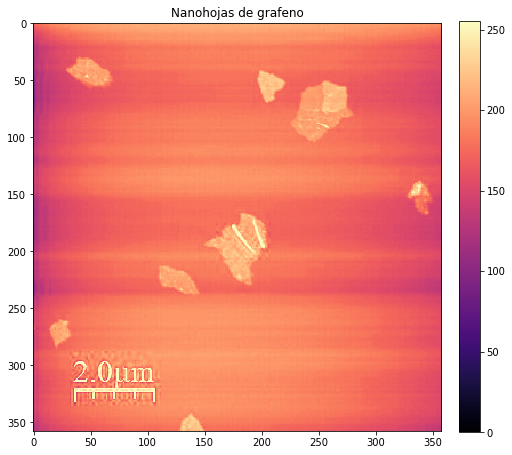

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(filepath) #imagen original
edit_img = img[:, :, 0] 
plt.figure(figsize=(8,8))

# Create function for plotting
def myplt(img, title):
    """This function displays the input image with interpolation='none', cmap='magma' in the range of 0-255 (8-bits). """
    plt.imshow(img,interpolation='none',cmap='magma', vmin=0, vmax=255) 
    plt.colorbar(fraction=0.046, pad=0.04) 
    plt.title(title)

myplt(edit_img, "Nanohojas de grafeno") 
plt.show()

 

Variable Type:  <class 'numpy.ndarray'>
Image data type:  uint8
Image dimension:  (358, 358)


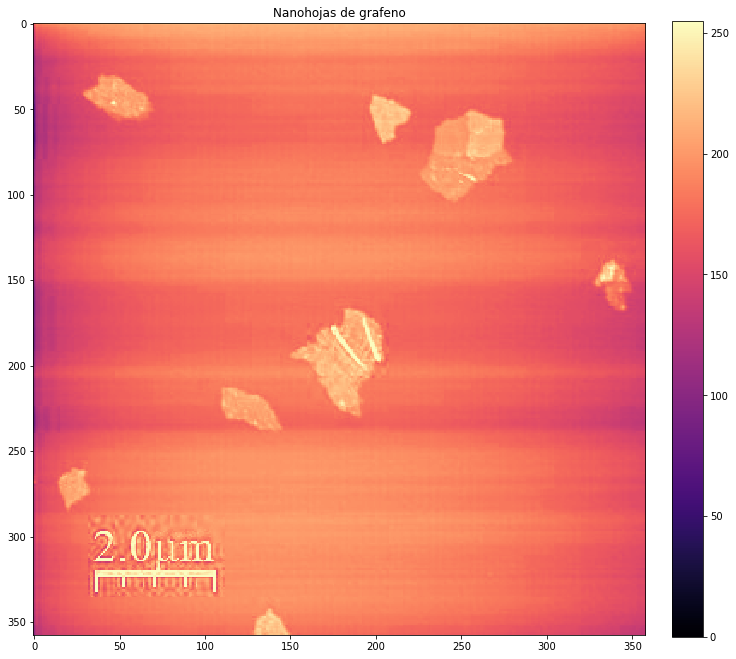

In [8]:
# Plot image and diplay image features

print('Variable Type: ', type(edit_img))
print('Image data type: ', edit_img.dtype)
print('Image dimension: ', edit_img.shape)
plt.figure(figsize=(12,12))
myplt(edit_img, "Nanohojas de grafeno")
plt.show()


# Preprocesamiento de imágenes:

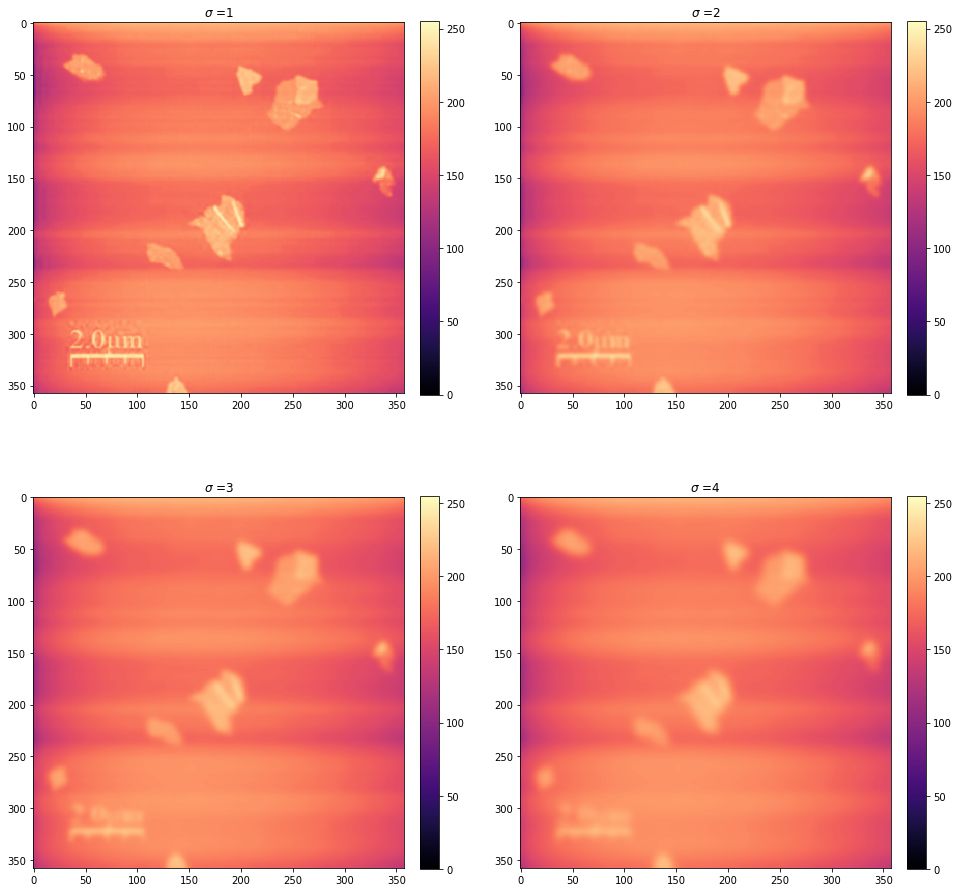

In [9]:
# Test for several values for the smoothing factor sigma
# note: range(start_value, end_value, step)
# Use the Gaussian filter function 'ndi.filters.gaussian_filter' from the 'scipy.ndimage'

plt.figure(figsize=(16,16))    
for sigma in range(1, 5, 1):
    edit_img_smooth_test = ndi.filters.gaussian_filter(edit_img, sigma)
    plt.subplot(2,2,sigma)
    txt = "$\sigma$ =" + str(sigma)
    myplt(edit_img_smooth_test, txt)
    

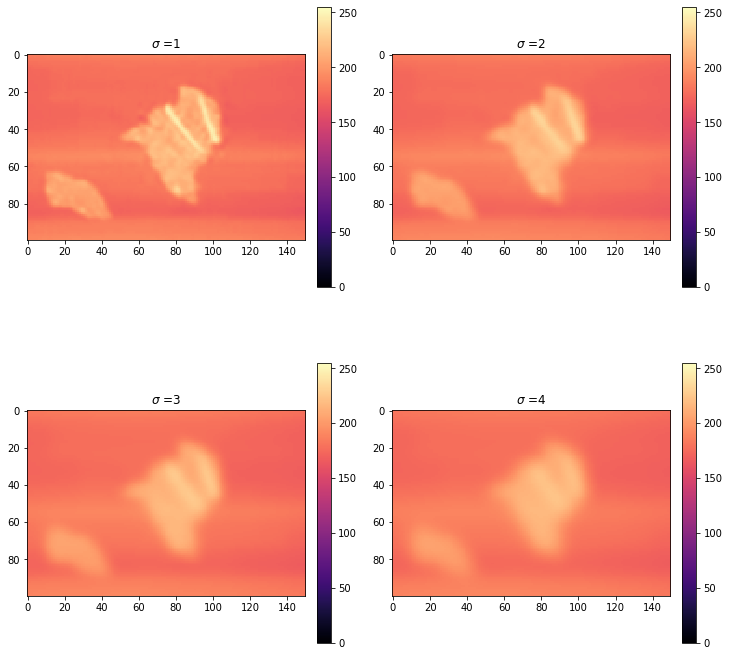

In [10]:
# 'Zoom-in' a specific region of the image

plt.figure(figsize=(12,12))    
for sigma in range(1, 5, 1):
    img_smooth_test = ndi.filters.gaussian_filter(edit_img[150:250, 100:250], sigma) #(Y1:Y2,X1:X2)
    plt.subplot(2,2,sigma)
    txt = "$\sigma$ =" + str(sigma)
    myplt(img_smooth_test, txt)

In [11]:
# Function to plot pairs of images

def pltPair(img1, img2, title1, title2, cmap1, cmap2, lim):
    """This function displays a pair of input image with interpolation='none',in the range of lims. """

    plt.figure(figsize=(16,16))    
    plt.subplot(1,2,1)    
    plt.imshow(img1, interpolation='none', cmap=cmap1, vmin=lim[0], vmax=lim[1])
    plt.title(title1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.subplot(1,2,2)        
    plt.imshow(img2, interpolation='none', cmap=cmap2, vmin=lim[2], vmax=lim[3])
    plt.title(title2)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.show()   

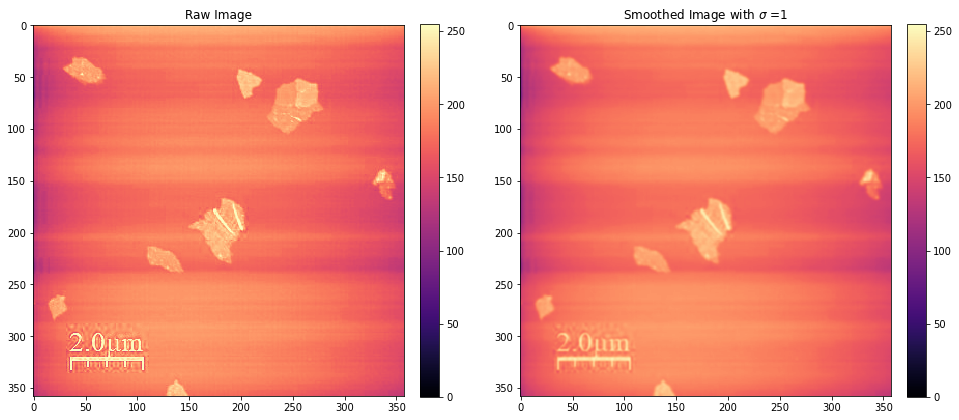

In [12]:
#  Show the raw and smoothed images side by side using 'plt.subplots'

sigma = 1
img_smooth = ndi.filters.gaussian_filter(edit_img, sigma)

pltPair(edit_img, img_smooth, 'Raw Image', 'Smoothed Image with '+"$\sigma$ =" + str(sigma), 'magma', 'magma', [0,255,0,255])

##  Foreground detection 

In [13]:
# Try out different thresholds to find the best one using 'widgets' for interactive selection

# Prepare widget
from ipywidgets import interact
@interact(thresh=(10,250,10))



def select_threshold(thresh=200):
    
    # Thresholding
    memu = img_smooth > thresh
    
    # Visualization
    pltPair(img_smooth, ~memu, 'Smoothed Image', 'Thresholded nanosheets with thresh =' + str(thresh), 'magma', 'gray', [0,255,0,1])


interactive(children=(IntSlider(value=200, description='thresh', max=250, min=10, step=10), Output()), _dom_cl…

# Binary Morphological operations

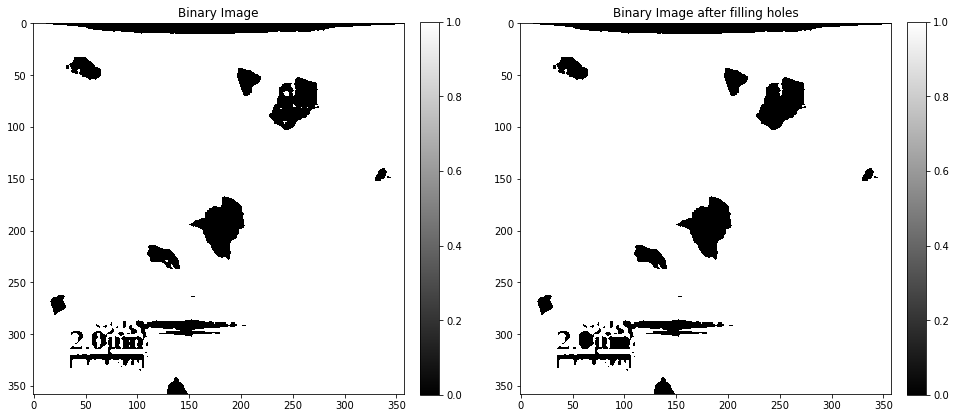

In [14]:
#!!!!!!!!!!Agregado:
memu = img_smooth > 200
mem_final = ~ndi.binary_fill_holes(memu)  # Short form

# Visualization
pltPair(~memu, mem_final, 'Binary Image', 'Binary Image after filling holes', 'gray', 'gray', [0,1,0,1])

# Automatic thresholding:

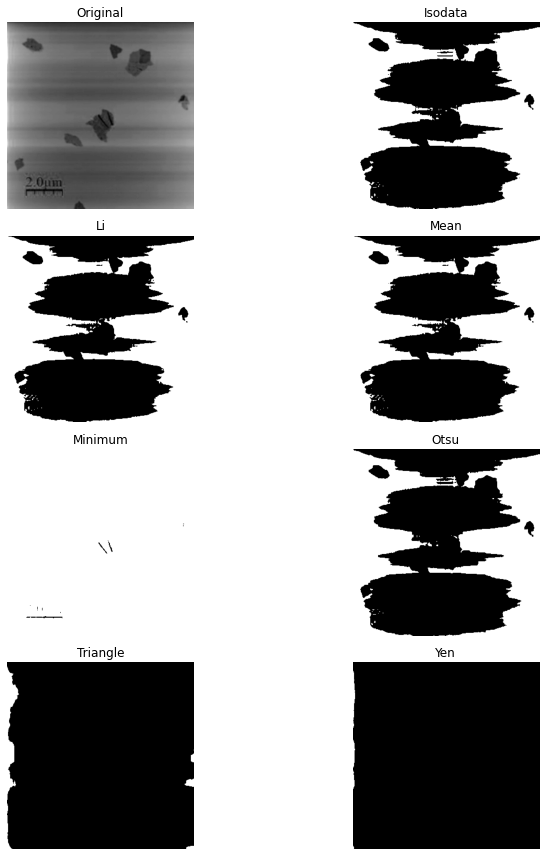

In [15]:
# You can asl try all algorithms aviable in 'skimage.filters.thresholding'
from skimage.filters.thresholding import try_all_threshold
fig = try_all_threshold(~img_smooth, figsize=(12,12), verbose=False)

# Segmentación:

36   Nanosheets detected


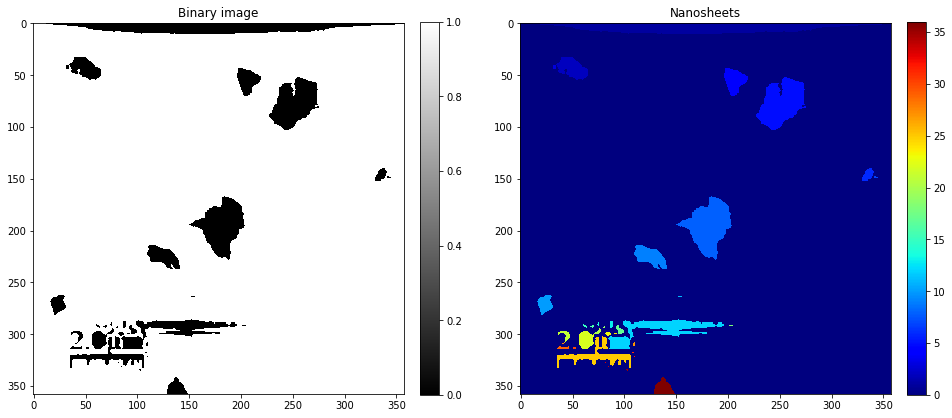

In [16]:
# Label connected components

# Use the function 'ndi.label' from the 'ndimage' module. 

cell_labels, _ = ndi.label(~mem_final)

iMax = cell_labels.max();
print(str(iMax), '  Nanosheets detected')
pltPair(mem_final, cell_labels,'Binary image', 'Nanosheets', 'gray', 'jet', [0,1,0,iMax])

Seeding by distance transform:

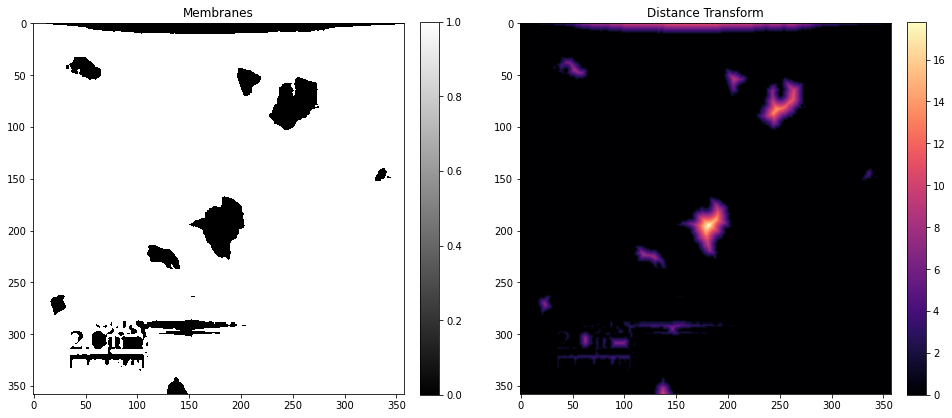

In [17]:
# Run a distance transform on the membrane mask
# Use the function 'ndi.distance_transform_edt'.

dist_trans = ndi.distance_transform_edt(~mem_final)
dMax = dist_trans.max();
pltPair(mem_final, dist_trans,'Membranes', 'Distance Transform', 'gray', 'magma', [0,1,0,dMax])

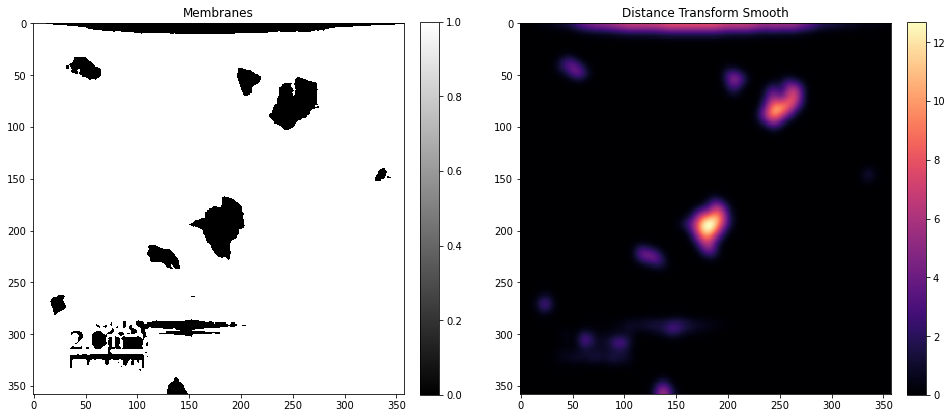

In [18]:
# Smoothen the distance transform

dist_trans_smooth = ndi.filters.gaussian_filter(dist_trans, sigma=5)
dMax = dist_trans_smooth.max();
pltPair(mem_final, dist_trans_smooth,'Membranes', 'Distance Transform Smooth', 'gray', 'magma', [0,1,0,dMax])

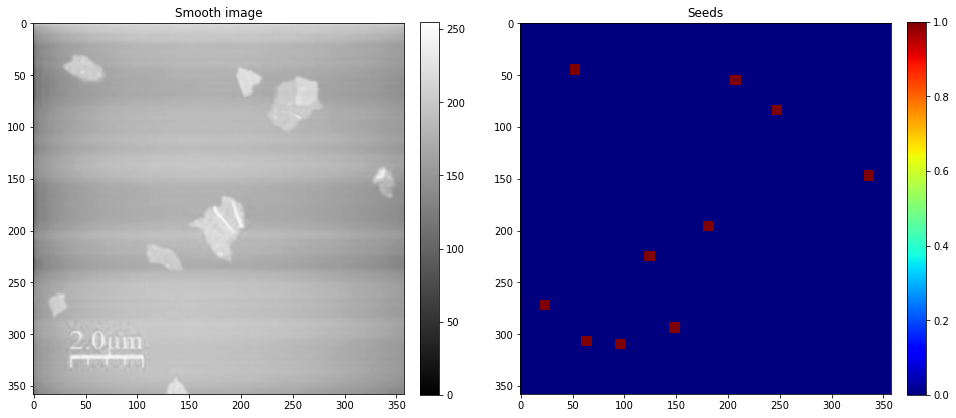

In [19]:
# Get the local maxima from the distance transform
# Use the function 'peak_local_max' from the module 'skimage.feature'. 

from skimage.feature import peak_local_max
seeds = peak_local_max(dist_trans_smooth, indices=False,  min_distance=20)

# Dilate seeds : for vizualization
seeds_dil = ndi.filters.maximum_filter(seeds, size=10)

pltPair(img_smooth, seeds_dil, 'Smooth image', 'Seeds', 'gray', 'jet', [0,255,0,1])

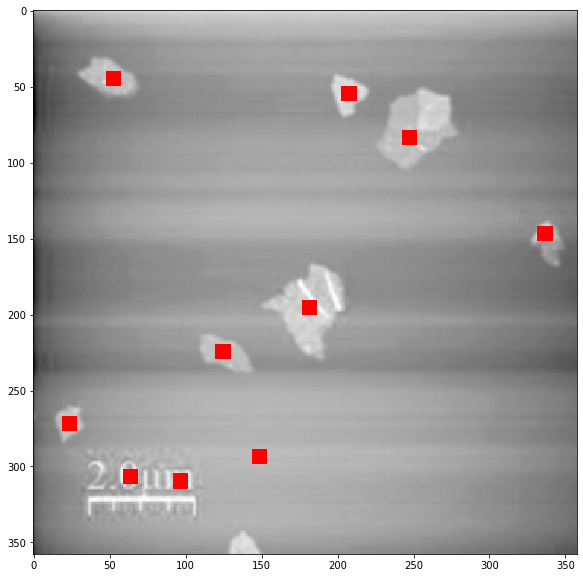

In [20]:
# Visualize the output as an overlay on the smoothed image


plt.figure(figsize=(10,10))
plt.imshow(img_smooth, interpolation='none', cmap='gray')
plt.imshow(np.ma.array(seeds_dil, mask=seeds_dil==0), interpolation='none', cmap='autumn')
plt.show()

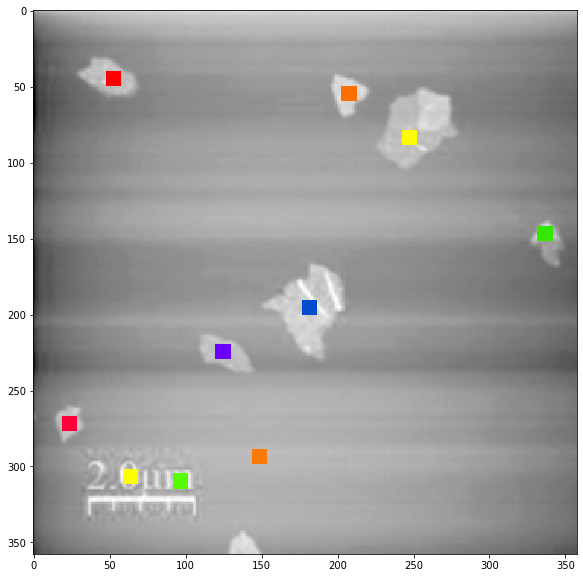

In [21]:
# Label the seeds using connected component 

# Use connected component labeling to give each cell seed a unique ID number.
seeds_labeled,_ = ndi.label(seeds)

# Visualize the final result 
seeds_labeled_dil = ndi.filters.maximum_filter(seeds_labeled, size=10)  # Expand a bit for visualization
plt.figure(figsize=(10,10))
plt.imshow(img_smooth, interpolation='none', cmap='gray')
plt.imshow(np.ma.array(seeds_labeled_dil, mask=seeds_labeled_dil==0), interpolation='none', cmap='prism')
plt.show()

# Fin del análisis

---



# Expansion by Watershed

10  nanosheets detected


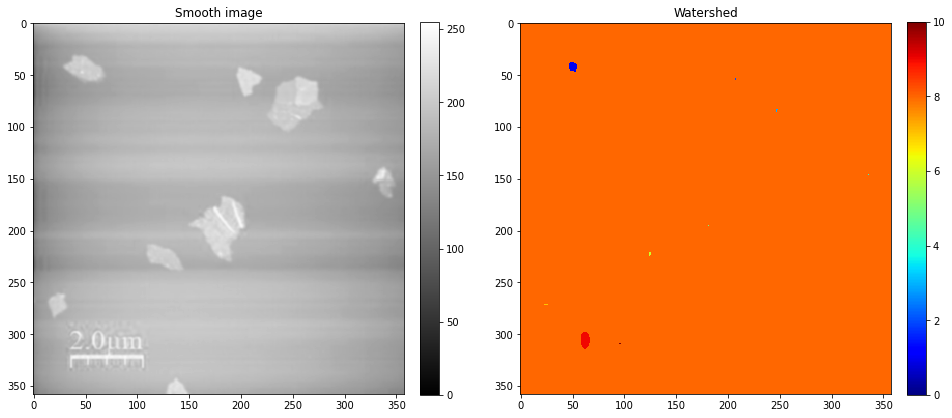

In [22]:
# Perform watershed
# Use the function 'watershed' from the module 'skimage.morphology'.

from skimage.segmentation import watershed
ws = watershed(img_smooth, seeds_labeled)

nCells0 = ws.max();
print(str(nCells0), ' nanosheets detected')
pltPair(img_smooth, ws, 'Smooth image', 'Watershed', 'gray', 'jet', [0,255,0,nCells0])
plt.show()

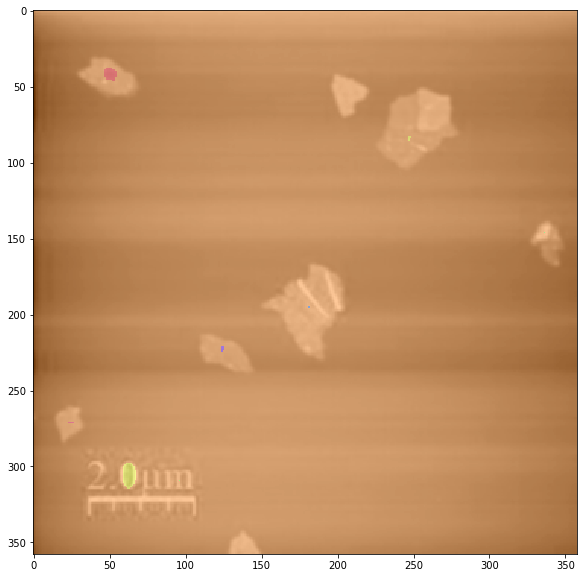

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(img_smooth, interpolation='none', cmap='gray')
plt.imshow(ws, interpolation='none', cmap='prism', alpha=0.4)
plt.show()

#  Postprocessing:

9  cells detected after removing the ones at the border


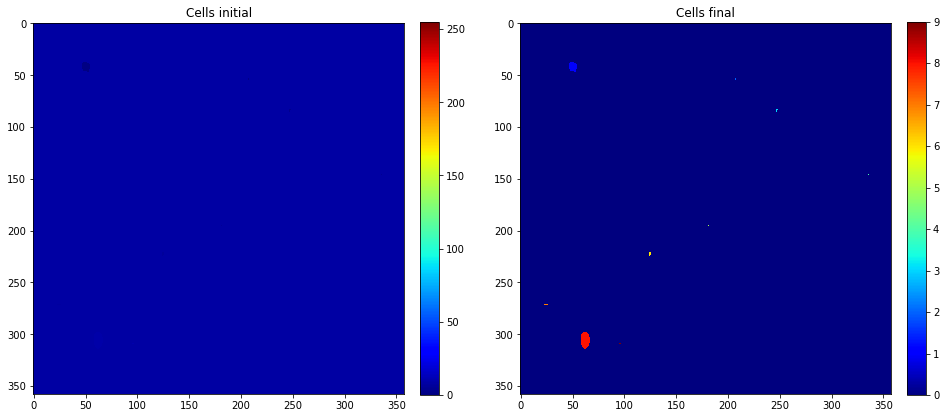

In [24]:
# Create an image border mask

border_mask = np.zeros(ws.shape, dtype=bool)
border_mask = ndi.binary_dilation(border_mask, border_value=1)

# Remove the cells at the border

# Create a copy of the initial result
clean_ws = np.copy(ws)

for cell_ID in np.unique(ws):

    # Create a mask that contains only the 'current' cell of the iteration
    cell_mask = ws==cell_ID 
    
    # Use the cell mask and the border mask to test if the cell has pixels touching 
    # the image border or not.
    cell_border_overlap = np.logical_and(cell_mask, border_mask)  # Overlap of cell mask and boundary mask
    total_overlap_pixels = np.sum(cell_border_overlap)            # Sum overlapping pixels

    # If a cell touches the image boundary, delete it by setting its pixels in the segmentation to 0.
    if total_overlap_pixels > 0: 
        clean_ws[cell_mask] = 0

# Re-label the remaining cells to keep the numbering consistent from 1 to N (with 0 as background).

for new_ID, cell_ID in enumerate(np.unique(clean_ws)[1:]):  # The [1:] excludes 0 from the list (background)!
    clean_ws[clean_ws==cell_ID] = new_ID+1                  # The same here for the +1
        
nCells = clean_ws.max();
print(str(nCells), ' cells detected after removing the ones at the border')
pltPair(ws, clean_ws, 'Cells initial', 'Cells final', 'jet', 'jet', [0,255,0,nCells])
plt.show()


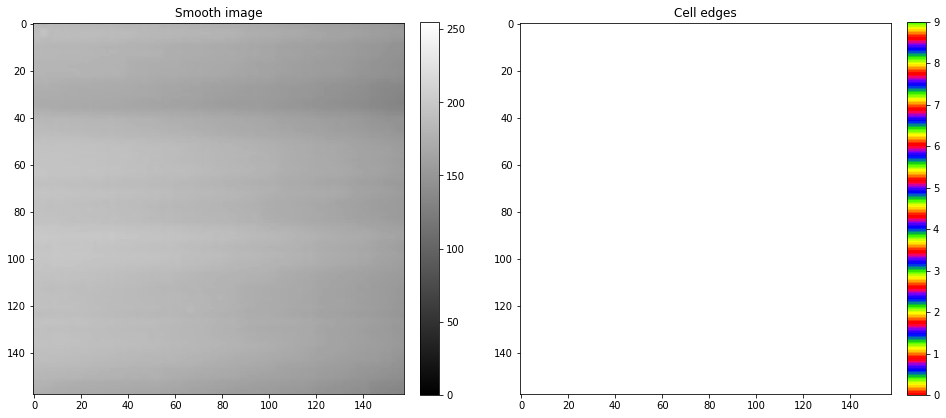

In [25]:
# Create cell edge mask
edges = np.zeros_like(clean_ws)

# Iterate over the cell IDs
for cell_ID in np.unique(clean_ws)[1:]:

    # Erode the cell's mask by 1 pixel using 'ndi.binary_erode'
    cell_mask = clean_ws==cell_ID
    eroded_cell_mask = ndi.binary_erosion(cell_mask, iterations=1) # 
    
    # Create the cell edge mask using 'np.logical_xor'
    edge_mask = np.logical_xor(cell_mask, eroded_cell_mask)
    
    # Add the cell edge mask to the empty array generated above, labeling it with the cell's ID
    edges[edge_mask] = cell_ID
    
# Vizualize   
maskEdges = np.ma.array(edges, mask=edges==0)
pltPair(img_smooth[200:400, 200:400], maskEdges[200:400, 200:400], 'Smooth image', 'Cell edges', 'gray', 'prism', [0,255,0,nCells])
plt.show()

# Extracting Quantitative Measurements

In [26]:
#Create a dictionary that contains a key-value pairing for each measurement

results = {"cell_id"      : [],
           "int_mean"     : [],
           "int_mem_mean" : [],
           "cell_area"    : [],
           "cell_edge"    : []}


# Run calculations for each cell

for cell_id in np.unique(clean_ws)[1:]:

    # Mask the current cell and cell edge
    cell_mask = clean_ws==cell_id
    edge_mask = edges==cell_id
    
    # Get the measurements
    results["cell_id"].append(cell_id)
    results["int_mean"].append(np.mean(img[cell_mask]))
    results["int_mem_mean"].append(np.mean(img[edge_mask]))
    results["cell_area"].append(np.sum(cell_mask))
    results["cell_edge"].append(np.sum(edge_mask))
    
# Print the results 
for key in results.keys(): 
    print(key + ":", results[key][:5], '\n')

cell_id: [1, 2, 3, 4, 5] 

int_mean: [109.0233918128655, 137.83333333333334, 111.75, 153.66666666666666, 132.33333333333334] 

int_mem_mean: [111.73611111111111, 137.83333333333334, 111.75, 153.66666666666666, 132.33333333333334] 

cell_area: [57, 2, 4, 1, 1] 

cell_edge: [24, 2, 4, 1, 1] 



## Analysis & Visualisation 

In [27]:
# (i) Get summarize the results


# Custom function for printing of summary statistics.
# Note the use of format strings for nice number padding.
def print_summary(data):
    print( "  Mean:    {:7.2f}".format(np.mean(data))   )
    print( "  Stdev:   {:7.2f}".format(np.std(data))    )
    print( "  Max:     {:7.2f}".format(np.max(data))    )
    print( "  Min:     {:7.2f}".format(np.min(data))    )
    print( "  Median:  {:7.2f}".format(np.median(data)) )

# Calling the custom function for each dataset
for key in results.keys():
    print( '\n'+key )
    print_summary(results[key])


cell_id
  Mean:       5.00
  Stdev:      2.58
  Max:        9.00
  Min:        1.00
  Median:     5.00

int_mean
  Mean:     136.83
  Stdev:     32.95
  Max:      219.67
  Min:      109.02
  Median:   132.33

int_mem_mean
  Mean:     145.87
  Stdev:     42.03
  Max:      220.71
  Min:      111.74
  Median:   132.33

cell_area
  Mean:      22.22
  Stdev:     39.47
  Max:      123.00
  Min:        1.00
  Median:     4.00

cell_edge
  Mean:       8.89
  Stdev:     11.78
  Max:       36.00
  Min:        1.00
  Median:     4.00
